## Linear Regression - Hồi quy tuyến tính 


**Hồi quy tuyến tính** là một trong những thuật toán học máy cơ bản nhất, là một mô hình tuyến tính biểu diễn giữa những giá trị đầu vào $x$ thì chỉ có duy nhất một giá trị $y$ đầu ra tương ứng.

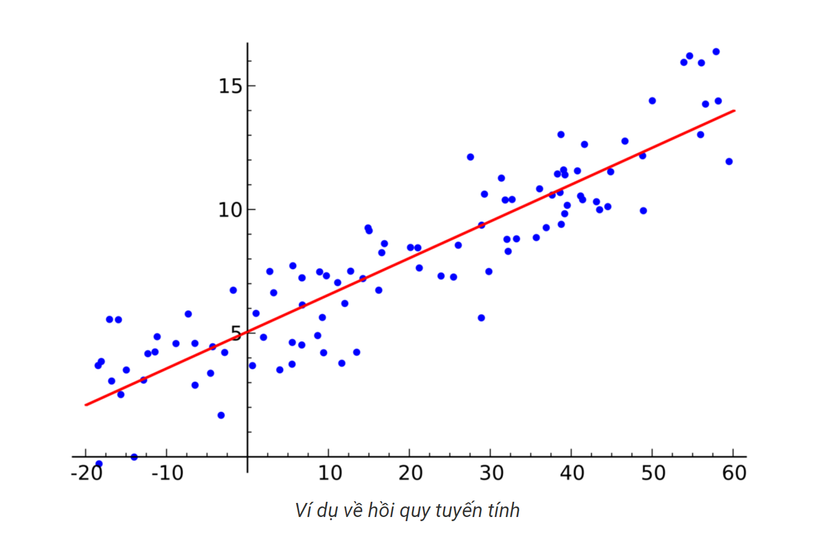

Hình ảnh trên biểu diễn mối quan hệ giữa biến đầu vào x và biến đầu ra y. Đường thẳng màu đỏ trên biểu đồ được cho là đường thẳng phù hợp nhất. Dựa vào các cặp điểm đã cho (màu xanh trên hình), chúng ta sẽ cố gắng tìm đường thằng phù hợp như hình vẽ.

### Đặc trưng (Features)
Đặc trưng là tập hợp các giá trị $x$, tương ứng với giá trị của một mẫu (sample)
$$ X = [x_0, x_1, ..., x_n] \in R^{n+1}$$

### Tham số (Parameters)
Tham số là tập hợp các giá trị mà chúng ta mong muốn mô hình có thể tìm được.
$$ W = [w_0, w_1, ..., w_n] \in R^{n+1}$$

$=>$ Phương trình $f_w(x)$ có thể được biểu diễn bằng $f_w (x) = X^T W = w_0x_0 +  w_1x_1 +  w_2x_2 + ... +  bw_nx_n + b$

### Cost Function
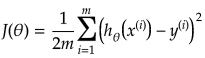

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import csv

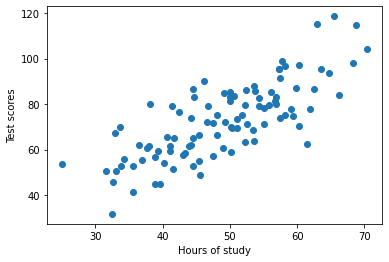

In [55]:
points = np.genfromtxt('data.csv', delimiter=',')
plt.scatter(points[:, 0], points[:, 1])
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.show()

In [43]:
lr = 0.0001
initial_b = 0
initial_m = 0
epochs = 10

In [56]:
def compute_cost(b, w, points):
    total_cost = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (w * x + b)) ** 2
    return total_cost/2 * N

In [57]:
def gradient_descent_runner(points, starting_b, starting_m, lr, epochs):
    b = starting_b
    m = starting_m
    cost_graph = []

    # Thực hiện huấn luyện trong nhiều vòng 
    for i in range(epochs):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, np.array(points), lr)

    return [b, m, cost_graph]

In [46]:
def step_gradient(b, m, points, lr):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - x * (y - (m * x + b)) / N
        b_gradient += - (y - (m * x + b)) / N
    
    # cập nhật trọng số cho weight và bias
    m_updated = m - lr * m_gradient
    b_updated = b - lr * b_gradient

    return b_updated, m_updated

In [58]:
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, lr, epochs)

print ('Optimized b:', b)
print ('Optimized m:', m)

print ('Minimized cost:', compute_cost(b, m, points))

Optimized b: 0.027713586724842695
Optimized m: 1.394730441275591
Minimized cost: 651588.0998130053


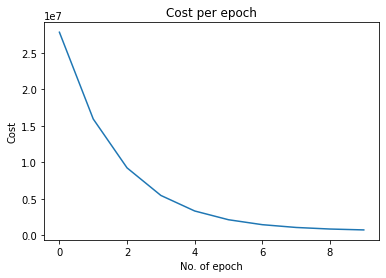

In [59]:
plt.plot(cost_graph)
plt.xlabel('No. of epoch')
plt.ylabel('Cost')
plt.title('Cost per epoch')
plt.show()

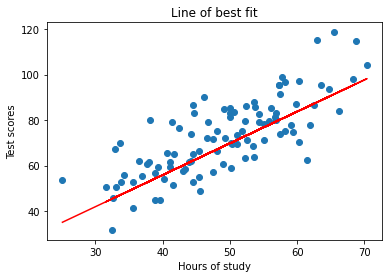

In [60]:
plt.scatter(points[:, 0], points[:, 1])
pred = m * points[:, 0] + b
plt.plot(points[:, 0], pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()